![school](dom-fou-YRMWVcdyhmI-unsplash.jpg)

# Initial Regression
### Normalizing and formatting data appropriately
For the categorical varaibles, as discovered in my EDA notebook, I'll create dummy columns and display boolean values.

In [50]:
#import the appropriate tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import plotly.express as px
import plotly.graph_objects as go
from plotly.figure_factory import create_scatterplotmatrix
%matplotlib inline

In [2]:
#import the data
df = pd.read_csv('test_scores 2.csv')
#fix dtypes
for column in df.columns:
    print(column,':',df[column].dtypes)

school : object
school_setting : object
school_type : object
classroom : object
teaching_method : object
n_student : float64
student_id : object
gender : object
lunch : object
pretest : float64
posttest : float64


In [3]:
#create dummies for categorical variables
cols_to_fix = ['school','school_setting','school_type','classroom','teaching_method','gender','lunch']
dummies = pd.DataFrame()
for item in cols_to_fix:
    new = pd.get_dummies(df[item],prefix=item,drop_first=True)
    dummies = pd.concat([dummies,new],axis=1)

dtype('uint8')

In [10]:
#drop og columns
# df.drop(cols_to_fix,axis=1,inplace=True)

In [40]:
#attach og to dummies
df = pd.concat([df,dummies],axis=1)
#create score difference column
df['score_growth'] = df.posttest-df.pretest

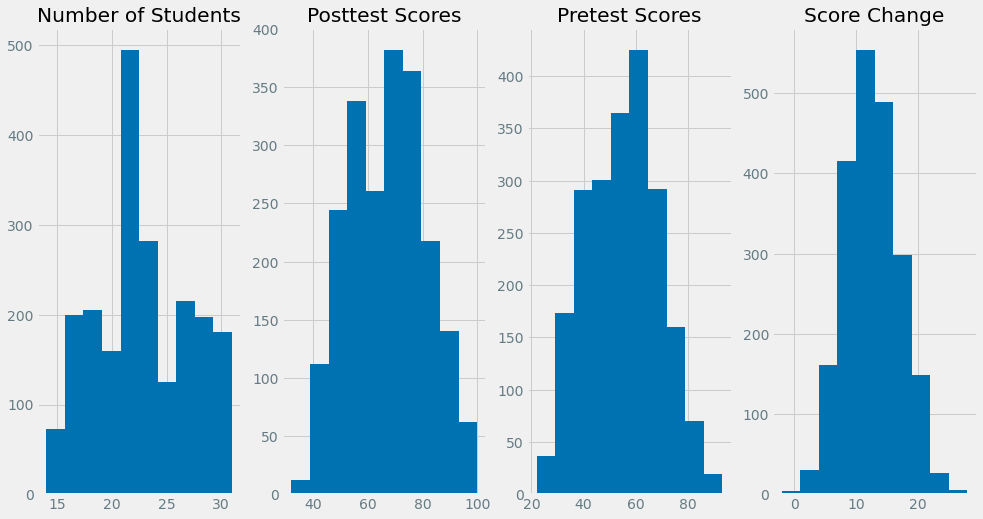

In [41]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,nrows=1,figsize=(15,8))
plt.style.use('seaborn-colorblind')
ax1.hist(df['n_student'],label='Number of Students')
ax2.hist(df['posttest'])
ax3.hist(df['pretest'])
ax4.hist(df['score_growth'])
ax1.title.set_text('Number of Students')
ax2.title.set_text('Posttest Scores')
ax3.title.set_text('Pretest Scores')
ax4.title.set_text('Score Change');

In [62]:
#check lin reg assumptions (linearity, normality, qqplots,homoscedascity)
outcome = 'posttest'
predictors = df.drop('posttest', axis=1)
pred_sum = '+'.join(predictors.columns)
# formula = outcome + '~' + pred_sum
formula = 'posttest~pretest+n_student'
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               posttest   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.019e+04
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:42:03   Log-Likelihood:                -6138.4
No. Observations:                2133   AIC:                         1.228e+04
Df Residuals:                    2130   BIC:                         1.230e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.3780      0.887     19.583      0.000      15.638      19.118
pretest        0.9599      0.008    121.016      0.000       0.944       0.975
n_student     -0.1328      0.025     -5.222      0.000      -0.183      -0.083
==============================================================================
Omnibus:                       18.967   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.511
Skew:                           0.203   Prob(JB):                     9.56e-05
Kurtosis:                       2.793   Cond. No.                         578.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
predictors.columns

Index(['n_student', 'student_id', 'pretest', 'school_CCAAW', 'school_CIMBB',
       'school_CUQAM', 'school_DNQDD', 'school_FBUMG', 'school_GJJHK',
       'school_GOKXL',
       ...
       'classroom_XZM', 'classroom_YTB', 'classroom_YUC', 'classroom_ZBH',
       'classroom_ZDT', 'classroom_ZNS', 'teaching_method_Standard',
       'gender_Male', 'lunch_Qualifies for reduced/free lunch',
       'score_growth'],
      dtype='object', length=624)

In [38]:
#normalize and scale

In [ ]:
#split the predictors & targetoutcome = 'mpg'
predictors = data_ols.drop('mpg', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [ ]:
#recursive modeling

In [ ]:
#build a preditor function

In [ ]:
#dashapp using predictor function